## 3. Ranking de consumo alcoólico geral.

Nesta análise o objetivo é identificar quais países mais consomem álcool em geral e quais menos consomem.

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [7]:
datasetPath = '../../data/drinks.csv'
df = pd.read_csv(datasetPath)

In [8]:
def filter_greather_than_zero(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Filtra o DataFrame retornando apenas as linhas onde o valor da coluna especificada é maior que zero.

    Args:
        df (pd.DataFrame): O DataFrame de entrada.
        column (str): O nome da coluna a ser avaliada.

    Returns:
        pd.DataFrame: Um novo DataFrame contendo apenas as linhas com valores positivos na coluna indicada.
    """
    return df.query(f'{column} > 0')

def get_ranking(df: pd.DataFrame, column: str, ascending: bool, head_amount: int) -> pd.DataFrame:
    """
    Retorna um DataFrame com os países ordenados com base em uma coluna específica.

    Args:
        df (pd.DataFrame): O DataFrame de entrada.
        column (str): O nome da coluna usada para ordenação.
        ascending (bool): Se True, ordena em ordem crescente; se False, decrescente.
        head_amount (int): Número de linhas a retornar no ranking.

    Returns:
        pd.DataFrame: Um DataFrame contendo os países no topo do ranking segundo a coluna escolhida.
    """
    return df.sort_values(by=column, ascending=ascending).head(head_amount)

def print_ranking(df: pd.DataFrame, column: str, ascending: bool, head_amount: int) -> None:
    """
    Exibe o ranking dos países com maior ou menor consumo com base na coluna especificada.

    Args:
        df (pd.DataFrame): O DataFrame de entrada.
        column (str): O nome da coluna usada como base do ranking.
        ascending (bool): Define se o ranking será em ordem crescente (menor consumo) ou decrescente (maior consumo).
        head_amount (int): Quantidade de países a exibir no ranking.

    Returns:
        None
    """
    display(df[['country', column]])

    print(f"\nTop {head_amount} países com {'menor' if ascending else 'maior'} consumo de {column}:")
    for i, row in enumerate(df.itertuples(index=False), start=1):
        print(f"{i}º {row.country} - {getattr(row, column)}")

def plot_ranking(df: pd.DataFrame, column: str, ascending: bool, head_amount: int) -> None:
    """
    Plota um gráfico de barras exibindo os países com maior ou menor consumo com base em uma coluna especificada.

    Argumentos:
        df (pd.DataFrame): DataFrame de entrada contendo os dados dos países.
        column (str): Nome da coluna usada para o ranking (ex: 'beer_servings').
        ascending (bool): Se True, exibe os países com menor consumo; se False, com maior consumo.
        head_amount (int): Número de países a serem incluídos no gráfico.

    Retorna:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.bar(df['country'], df[column])

    order = 'menor' if ascending else 'maior'
    title_column = column.replace('_', ' ').capitalize()
    plt.title(f'Top {head_amount} países com {order} consumo de {title_column}')

    plt.xlabel('País')
    plt.ylabel(title_column)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [9]:
total_litres_of_pure_alcohol_head_amount = 10
df_total_litres_of_pure_alcohol_grather_than_zero = filter_greather_than_zero(df, 'total_litres_of_pure_alcohol')

Países que menos consomem.

,country,total_litres_of_pure_alcohol
38,Comoros,0.1
123,Niger,0.1
116,Myanmar,0.1
78,Indonesia,0.1
171,Timor-Leste,0.1
190,Yemen,0.1
149,Saudi Arabia,0.1
70,Guinea,0.2
119,Nepal,0.2
53,Egypt,0.2



Top 10 países com menor consumo de total_litres_of_pure_alcohol:
1º Comoros - 0.1
2º Niger - 0.1
3º Myanmar - 0.1
4º Indonesia - 0.1
5º Timor-Leste - 0.1
6º Yemen - 0.1
7º Saudi Arabia - 0.1
8º Guinea - 0.2
9º Nepal - 0.2
10º Egypt - 0.2


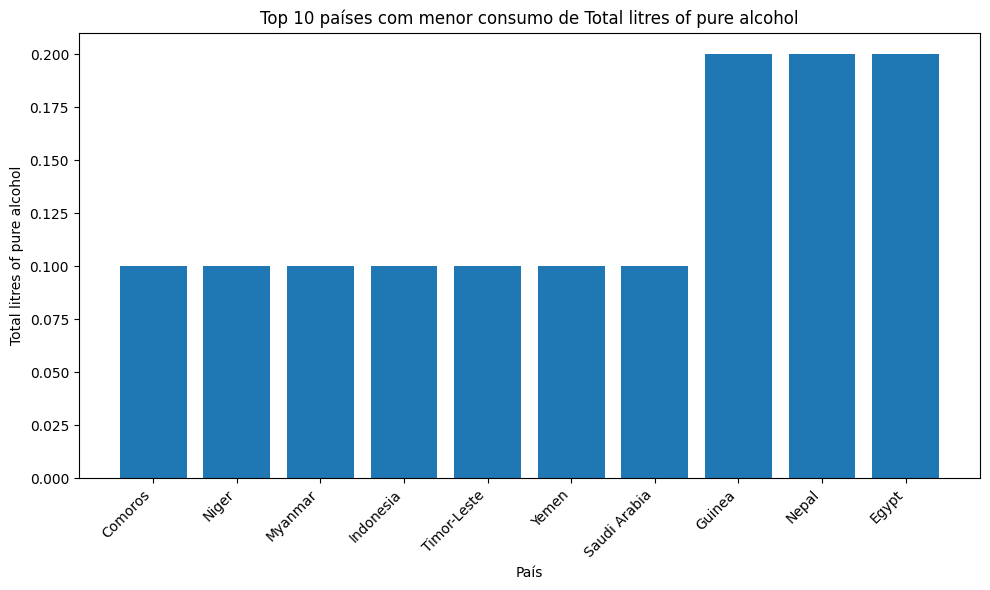

In [10]:
df_total_litres_of_pure_alcohol_asc = get_ranking(df_total_litres_of_pure_alcohol_grather_than_zero, 'total_litres_of_pure_alcohol', True, total_litres_of_pure_alcohol_head_amount)
print_ranking(df_total_litres_of_pure_alcohol_asc, 'total_litres_of_pure_alcohol', True, total_litres_of_pure_alcohol_head_amount)

plot_ranking(df_total_litres_of_pure_alcohol_asc, 'total_litres_of_pure_alcohol', True, total_litres_of_pure_alcohol_head_amount)

Países que mais consomem.

,country,total_litres_of_pure_alcohol
15,Belarus,14.4
98,Lithuania,12.9
3,Andorra,12.4
68,Grenada,11.9
45,Czech Republic,11.8
61,France,11.8
141,Russian Federation,11.5
99,Luxembourg,11.4
81,Ireland,11.4
155,Slovakia,11.4



Top 10 países com maior consumo de total_litres_of_pure_alcohol:
1º Belarus - 14.4
2º Lithuania - 12.9
3º Andorra - 12.4
4º Grenada - 11.9
5º Czech Republic - 11.8
6º France - 11.8
7º Russian Federation - 11.5
8º Luxembourg - 11.4
9º Ireland - 11.4
10º Slovakia - 11.4


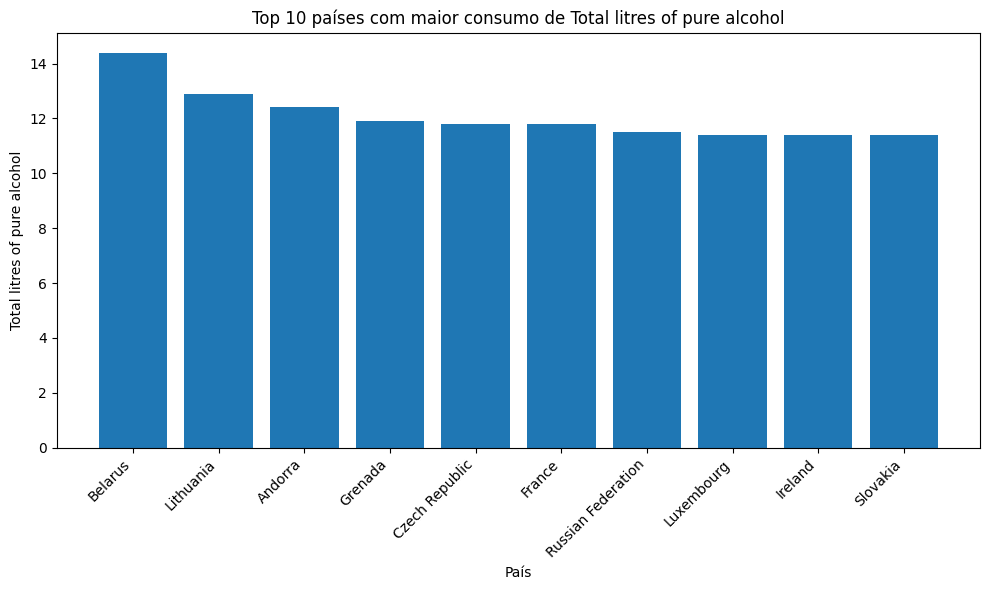

In [11]:
df_total_litres_of_pure_alcohol_desc = get_ranking(df_total_litres_of_pure_alcohol_grather_than_zero, 'total_litres_of_pure_alcohol', False, total_litres_of_pure_alcohol_head_amount)
print_ranking(df_total_litres_of_pure_alcohol_desc, 'total_litres_of_pure_alcohol', False, total_litres_of_pure_alcohol_head_amount)

plot_ranking(df_total_litres_of_pure_alcohol_desc, 'total_litres_of_pure_alcohol', False, total_litres_of_pure_alcohol_head_amount)